# Low mode phase speed

The analysis is performed in matlab 'low_mode_criticality_all.m'.

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import munch
import utils
import glob

In [2]:
# Matlab analysis
dm = utils.loadmat("../proc_data/TG_phase_speed.mat")
angles = dm["angles"]
cps = dm["cps"]
# Towyos separate
data_files = glob.glob("../proc_data/TY*.mat")
TYs = np.asarray([munch.munchify(utils.loadmat(file)) for file in data_files])
P5TYs = [TY for TY in TYs if ((TY.sill == "P5") and (TY.year == 2014))]
# Bathymetry
bathy = xr.open_dataset("../raw_data/merged_200_-171.5_-167.5_-11_-6.5.nc")
bathyP5 = bathy.isel(lon=(bathy.lon < -168.5) & (bathy.lon > -168.8), lat=(bathy.lat > -8.3) & (bathy.lat < -7.9))
# Towyos together
ds = xr.open_dataset("../proc_data/stacked_towyos.nc")
ds


<xarray.Dataset>
Dimensions:      (pfl: 614, z: 1401)
Coordinates:
  * z            (z) float64 -3.9e+03 -3.901e+03 ... -5.299e+03 -5.3e+03
  * pfl          (pfl) int64 0 1 2 3 4 5 6 7 ... 606 607 608 609 610 611 612 613
    lon          (pfl) float64 ...
    lat          (pfl) float64 ...
    x            (pfl) float64 ...
    y            (pfl) float64 ...
Data variables:
    T            (z, pfl) float64 ...
    S            (z, pfl) float64 ...
    CT           (z, pfl) float64 ...
    SA           (z, pfl) float64 ...
    u            (z, pfl) float64 ...
    v            (z, pfl) float64 ...
    sig4         (z, pfl) float64 ...
    sig4_sorted  (z, pfl) float64 ...
    b            (z, pfl) float64 ...
    b_sorted     (z, pfl) float64 ...
    eps          (z, pfl) float64 ...
    LT           (z, pfl) float64 ...
    Lo           (z, pfl) float64 ...
    N2_overturn  (z, pfl) float64 ...

Histogram of low mode phase speeds.

(array([ 0.,  0.,  0.,  0.,  0.,  2.,  0.,  0.,  2.,  2.,  8., 23., 42.,
        55., 83., 83., 74., 69., 49., 29., 20., 23.,  8.,  6.,  4.,  9.,
         3.,  0.,  1.,  0.,  0.,  1.]),
 array([-0.4  , -0.375, -0.35 , -0.325, -0.3  , -0.275, -0.25 , -0.225,
        -0.2  , -0.175, -0.15 , -0.125, -0.1  , -0.075, -0.05 , -0.025,
         0.   ,  0.025,  0.05 ,  0.075,  0.1  ,  0.125,  0.15 ,  0.175,
         0.2  ,  0.225,  0.25 ,  0.275,  0.3  ,  0.325,  0.35 ,  0.375,
         0.4  ]),
 <BarContainer object of 32 artists>)

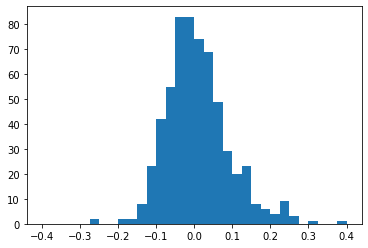

In [3]:
fig, ax = plt.subplots()
ax.hist(cps, bins=np.linspace(-0.4, 0.4, 33))

Map of phase speeds

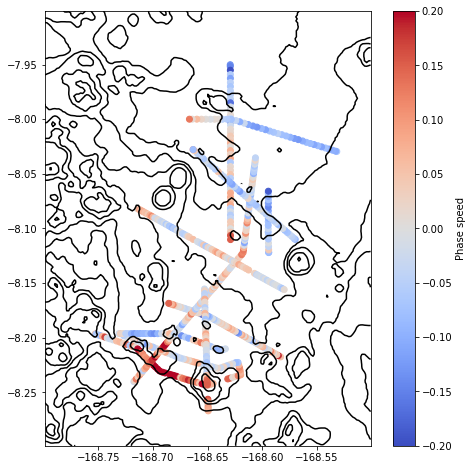

In [4]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_aspect("equal")
ax.contour(bathyP5.lon, bathyP5.lat, bathyP5.z, colors="k")
CS = ax.scatter(ds.lon, ds.lat, c=cps, vmin=-0.2, vmax=0.2, cmap="coolwarm")
# ax.plot(ds.lon[Fr > 1], ds.lat[Fr > 1], 'r.')
# CS = ax.scatter(ds.lon, ds.lat, c=Fr)
cb = plt.colorbar(CS)
cb.set_label("Phase speed")